 # 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

 - virgicolorとvirginica
 - sepal_lengthとpetal_length

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
y = y.reshape([150,1])
y.shape

(150, 1)

In [4]:
import numpy as np
import pandas as pd

iris_df = pd.DataFrame(np.hstack((X, y)),
                       columns=["sepal_length","sepal_width", "petal_length", "petal_width", "Species"])

In [5]:
iris_df = iris_df.drop(["sepal_width", "petal_width"], axis=1) 

In [6]:
iris_df = iris_df[(iris_df["Species"] == 1.0) | (iris_df["Species"] == 2.0)].reset_index(drop=True)

In [7]:
iris_df.shape

(100, 3)

In [8]:
iris_df["Species"].unique()

array([1., 2.])

In [9]:
iris_df.head(20)

,sepal_length,petal_length,Species
0,7.0,4.7,1.0
1,6.4,4.5,1.0
2,6.9,4.9,1.0
3,5.5,4.0,1.0
4,6.5,4.6,1.0
5,5.7,4.5,1.0
6,6.3,4.7,1.0
7,4.9,3.3,1.0
8,6.6,4.6,1.0
9,5.2,3.9,1.0


 # 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
iris_df_replace = iris_df.replace({1.0:"virgicolor", 2.0:"virginica"})

In [12]:
iris_df_replace

,sepal_length,petal_length,Species
0,7.0,4.7,virgicolor
1,6.4,4.5,virgicolor
2,6.9,4.9,virgicolor
3,5.5,4.0,virgicolor
4,6.5,4.6,virgicolor
...,...,...,...
95,6.7,5.2,virginica
96,6.3,5.0,virginica
97,6.5,5.2,virginica
98,6.2,5.4,virginica


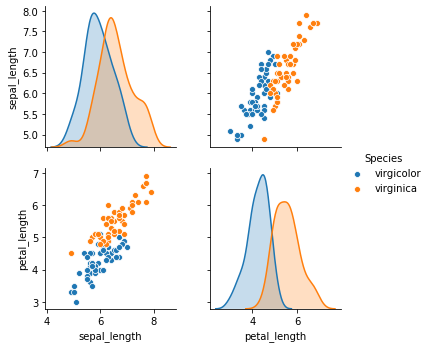

In [13]:
sns.pairplot(iris_df_replace, hue="Species", height=2.5)

Text(0.5, 1.0, 'iris_sepal_length')

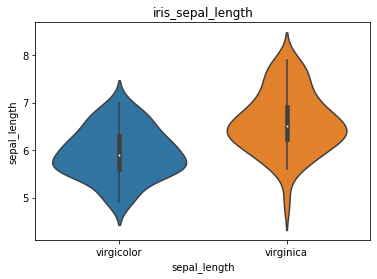

In [14]:
fig, ax = plt.subplots()
sns.violinplot(x="Species", y="sepal_length", data=iris_df_replace )

ax.set_xlabel('sepal_length')
ax.set_title('iris_sepal_length')

Text(0.5, 1.0, 'iris_sepal_length')

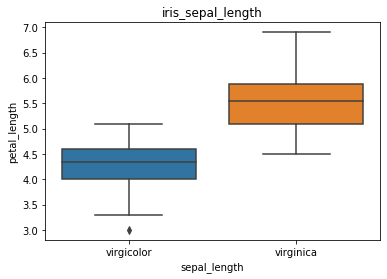

In [15]:
fig, ax = plt.subplots()
sns.boxplot(x="Species", y="petal_length", data=iris_df_replace )

ax.set_xlabel('sepal_length')
ax.set_title('iris_sepal_length')

Text(0.5, 1.0, 'iris_sepal_length')

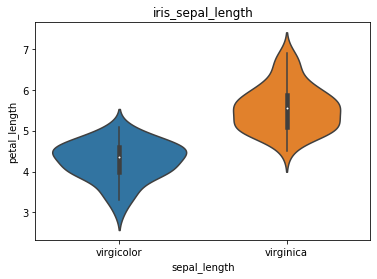

In [16]:
fig, ax = plt.subplots()
sns.violinplot(x="Species", y="petal_length", data=iris_df_replace )

ax.set_xlabel('sepal_length')
ax.set_title('iris_sepal_length')

 # 【問題3】前処理・訓練用データと検証用データの分割
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

In [17]:
iris_df["Species"] = iris_df["Species"].replace({2.0:1.0,1.0:0.0})
iris_df2 = iris_df

In [18]:
iris_df2["Species"].unique()

array([0., 1.])

In [19]:
from sklearn.model_selection import train_test_split
X = np.array(iris_df2.drop("Species", axis=1))
y = np.array(iris_df2["Species"])
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

 # 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
X_train_std[:10]

array([[-1.77029021, -2.29778941],
       [ 0.03817879, -0.24187257],
       [-0.56464421,  0.24187257],
       [ 0.18888454,  0.84655399],
       [-0.11252696, -0.12093628],
       [ 0.33959029,  0.24187257],
       [ 1.69594204,  1.45123542],
       [ 0.64100179,  0.84655399],
       [ 2.14805929,  2.4187257 ],
       [-0.71534996,  0.24187257]])

 # 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train_std, y_train)
knc_pred = knc.predict(X_test_std)
print("n_neighbors=1")
print(knc.predict(X_test_std))


knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train_std, y_train)
knc_pred = knc.predict(X_test_std)
print("n_neighbors=3")
print(knc.predict(X_test_std))

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train_std, y_train)
knc_pred = knc.predict(X_test_std)
print("n_neighbors=5")
print(knc.predict(X_test_std))

n_neighbors=1
[0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0.]
n_neighbors=3
[0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0.]
n_neighbors=5
[0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0.]


 # 【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

 - scikit-learnを使い4種類の指標を計算する
 - 混同行列をscikit-learnを使い表示する
 - 4種類の指標値の意味について簡単に調査して文章でまとめる

 ## ①scikit-learnを使い4種類の指標を計算する
 ## ②混同行列をscikit-learnを使い表示する

In [24]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train_std, y_train)
knc_pred = knc.predict(X_test_std)
print("正解率:{}".format(knc.score(X_test_std, y_test)))
print("適合率:{}".format(precision_score(y_test,knc_pred)))
print("再現率:{}".format(recall_score(y_test,knc_pred)))
print("F値 :{}".format(f1_score(y_test,knc_pred)))
print("n_neighbors={}".format(5))
print(confusion_matrix(y_test, knc_pred))
print("=======================")

正解率:0.88
適合率:0.8
再現率:1.0
F値 :0.888888888888889
n_neighbors=5
[[10  3]
 [ 0 12]]


In [25]:
from sklearn.metrics import precision_score
for i in range(1,11):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train_std, y_train)
    knc_pred = knc.predict(X_test_std)
    print("正解率:{}".format(knc.score(X_test_std, y_test)))
    print("適合率:{}".format(precision_score(y_test,knc_pred)))
    print("再現率:{}".format(recall_score(y_test,knc_pred)))
    print("F値 :{}".format(f1_score(y_test,knc_pred)))
    print("n_neighbors={}".format(i))
    print(confusion_matrix(y_test, knc_pred))
    print("=======================")

正解率:0.84
適合率:0.7857142857142857
再現率:0.9166666666666666
F値 :0.8461538461538461
n_neighbors=1
[[10  3]
 [ 1 11]]
正解率:0.88
適合率:0.8461538461538461
再現率:0.9166666666666666
F値 :0.8799999999999999
n_neighbors=2
[[11  2]
 [ 1 11]]
正解率:0.92
適合率:0.8571428571428571
再現率:1.0
F値 :0.923076923076923
n_neighbors=3
[[11  2]
 [ 0 12]]
正解率:0.92
適合率:0.8571428571428571
再現率:1.0
F値 :0.923076923076923
n_neighbors=4
[[11  2]
 [ 0 12]]
正解率:0.88
適合率:0.8
再現率:1.0
F値 :0.888888888888889
n_neighbors=5
[[10  3]
 [ 0 12]]
正解率:0.92
適合率:0.8571428571428571
再現率:1.0
F値 :0.923076923076923
n_neighbors=6
[[11  2]
 [ 0 12]]
正解率:0.92
適合率:0.8571428571428571
再現率:1.0
F値 :0.923076923076923
n_neighbors=7
[[11  2]
 [ 0 12]]
正解率:0.92
適合率:0.8571428571428571
再現率:1.0
F値 :0.923076923076923
n_neighbors=8
[[11  2]
 [ 0 12]]
正解率:0.92
適合率:0.8571428571428571
再現率:1.0
F値 :0.923076923076923
n_neighbors=9
[[11  2]
 [ 0 12]]
正解率:0.92
適合率:0.8571428571428571
再現率:1.0
F値 :0.923076923076923
n_neighbors=10
[[11  2]
 [ 0 12]]


 ## ③4種類の指標値の意味について簡単に調査して文章でまとめる

 - Accuracy（正解率）：　
    全予測に対する正答率
    
 - Precision（適合率）：　
    正と予測したデータのうち，実際に正であるものの割合

 - Recall（再現率）：　
    実際に正であるもののうち，正であると予測されたものの割合
    
 - F値：　
    適合率と再現率の調和平均

# 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


In [27]:
X_train_std

array([[-1.77029021e+00, -2.29778941e+00],
       [ 3.81787899e-02, -2.41872570e-01],
       [-5.64644209e-01,  2.41872570e-01],
       [ 1.88884540e-01,  8.46553995e-01],
       [-1.12526960e-01, -1.20936285e-01],
       [ 3.39590289e-01,  2.41872570e-01],
       [ 1.69594204e+00,  1.45123542e+00],
       [ 6.41001789e-01,  8.46553995e-01],
       [ 2.14805929e+00,  2.41872570e+00],
       [-7.15349959e-01,  2.41872570e-01],
       [ 6.41001789e-01,  1.20936285e-01],
       [-1.12526960e-01, -4.83745140e-01],
       [-2.07170171e+00, -4.83745140e-01],
       [-8.66055709e-01,  1.20936285e-01],
       [ 6.41001789e-01,  9.67490280e-01],
       [ 1.88884540e-01, -4.83745140e-01],
       [ 1.88884540e-01,  4.83745140e-01],
       [-7.15349959e-01, -1.08842656e+00],
       [-2.63232710e-01, -3.62808855e-01],
       [ 3.39590289e-01, -3.62808855e-01],
       [ 6.41001789e-01, -6.04681425e-01],
       [-7.15349959e-01, -9.67490280e-01],
       [-1.16746721e+00, -6.04681425e-01],
       [-1.

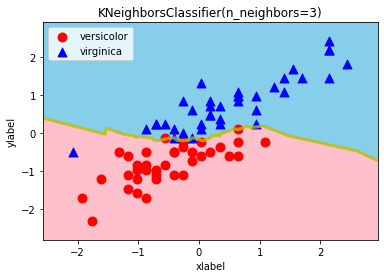

In [28]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train_std, y_train)
# knc_pred = knc.predict(X_test_std)
decision_region(X_train_std, y_train, knc, step=0.01, title='KNeighborsClassifier(n_neighbors=3)', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

 # 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

 - 最近傍法
 - ロジスティック回帰
 - SVM
 - 決定木
 - ランダムフォレスト

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
models = {"KNeighborsClassifier":KNeighborsClassifier(n_neighbors=1), "LogisticRegression":LogisticRegression(), 
                  "SVC":SVC(), "DecisionTreeClassifier":DecisionTreeClassifier(), "RandomForestClassifier":RandomForestClassifier()}
scor_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

for model in models.values():
    clf = model
    clf.fit(X_train_std, y_train)
    clf_pred = clf.predict(X_test_std)
    scor_list.append(clf.score(X_test_std, y_test))
    precision_score_list.append(precision_score(y_test,clf_pred))
    recall_score_list.append(recall_score(y_test,clf_pred))
    f1_score_list.append(f1_score(y_test,clf_pred))
    
pd.DataFrame({
                   "正解率":scor_list, 
                   "適合率":precision_score_list, 
                   "再現率":recall_score_list, 
                   "F値 ":f1_score_list },
                  index=models.keys())
    
#     print(clf)
#     print("正解率:{}".format(clf.score(X_test_std, y_test)))
#     print("適合率:{}".format(precision_score(y_test,clf_pred)))
#     print("再現率:{}".format(recall_score(y_test,clf_pred)))
#     print("F値 :{}".format(f1_score(y_test,clf_pred)))
#     print(confusion_matrix(y_test,clf_pred))
#     decision_region(X_train_std, y_train, clf, step=0.01, 
#                     title=model, xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
#     print("=======================")

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,正解率,適合率,再現率,F値
KNeighborsClassifier,0.84,0.785714,0.916667,0.846154
LogisticRegression,0.92,0.857143,1.000000,0.923077
SVC,0.92,0.857143,1.000000,0.923077
DecisionTreeClassifier,0.88,0.800000,1.000000,0.888889
RandomForestClassifier,0.88,0.800000,1.000000,0.888889


 - 正解率は「ロジスティック回帰」と「SVC」が0.92で最も高い。
 - 適合率は、「ロジスティック回帰」と「SVC」が0.85で最も高い。
 - 再現率は、「最近傍法」以外が1.0と高い。
 - F値は、ロジスティック回帰」と「SVC」が0.92で最も高い。

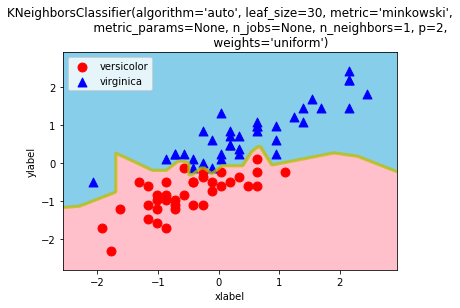

/Users/naoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


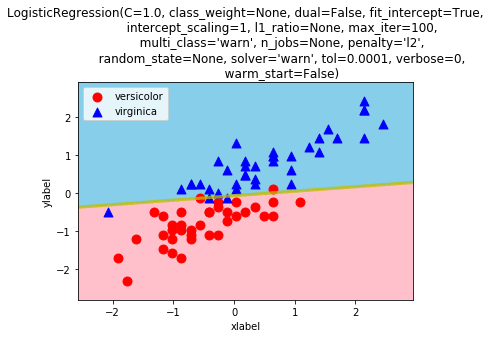

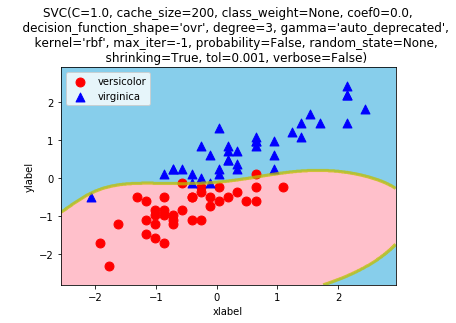

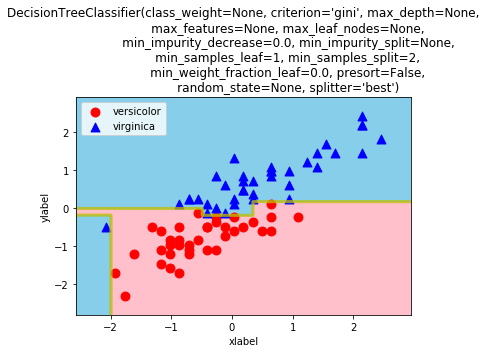

/Users/naoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


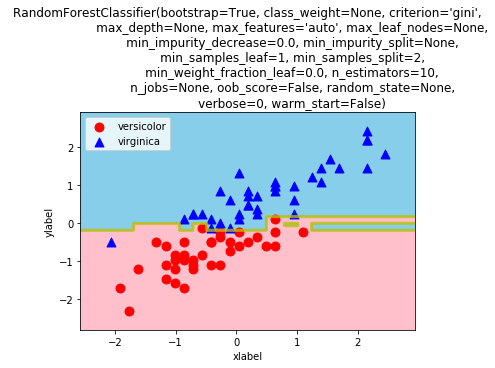

In [30]:
models = [KNeighborsClassifier(n_neighbors=1), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()] 

for model in models:
    clf = model
    clf.fit(X_train_std, y_train)
    clf_pred = clf.predict(X_test_std)
#     print(clf)
#     print("正解率:{}".format(clf.score(X_test_std, y_test)))
#     print("適合率:{}".format(precision_score(y_test,clf_pred)))
#     print("再現率:{}".format(recall_score(y_test,clf_pred)))
#     print("F値 :{}".format(f1_score(y_test,clf_pred)))
#     print(confusion_matrix(y_test,clf_pred))
    decision_region(X_train_std, y_train, clf, step=0.01, 
                    title=model, xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
    print("===============================================")

 - 「最近傍法」の決定境界線は曲線になっている。
 - 「ロジスティック回帰」の決定境界線は一直線になっている。
 - 「SVC」の決定境界線は滑らかな曲線になっている。
 - 「決定木」「ランダムフォレスト」の決定境界線は直線を複数つなげたような複雑な線になっている。

# 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [31]:
X2 =iris_df.drop(["Species"], axis=1)
y = np.array(iris_df["Species"])

In [32]:
y = y.reshape([100,1])
y.shape

(100, 1)

In [33]:
(X2_train, X2_test,
 y2_train, y2_test) = train_test_split(
    X2, y, test_size=0.25, random_state=0,
)

In [34]:
models = {"KNeighborsClassifier":KNeighborsClassifier(n_neighbors=1), "LogisticRegression":LogisticRegression(), 
                  "SVC":SVC(), "DecisionTreeClassifier":DecisionTreeClassifier(), "RandomForestClassifier":RandomForestClassifier()}
scor_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

for model in models.values():
    clf = model
    clf.fit(X2_train, y_train)
    clf_pred = clf.predict(X2_test)
    scor_list.append(clf.score(X2_test, y_test))
    precision_score_list.append(precision_score(y_test,clf_pred))
    recall_score_list.append(recall_score(y_test,clf_pred))
    f1_score_list.append(f1_score(y_test,clf_pred))

print("**標準化前**")
pd.DataFrame({
                   "正解率":scor_list, 
                   "適合率":precision_score_list, 
                   "再現率":recall_score_list, 
                   "F値 ":f1_score_list },
                  index=models.keys())

**標準化前**


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,正解率,適合率,再現率,F値
KNeighborsClassifier,0.84,0.785714,0.916667,0.846154
LogisticRegression,0.88,0.800000,1.000000,0.888889
SVC,0.92,0.857143,1.000000,0.923077
DecisionTreeClassifier,0.88,0.800000,1.000000,0.888889
RandomForestClassifier,0.84,0.785714,0.916667,0.846154


**標準化前**


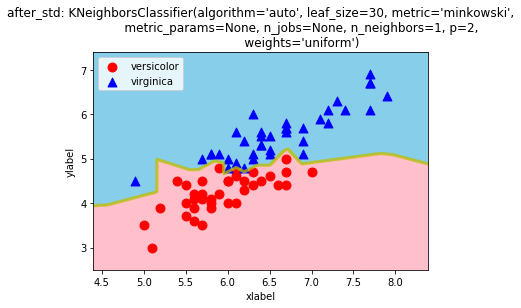

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


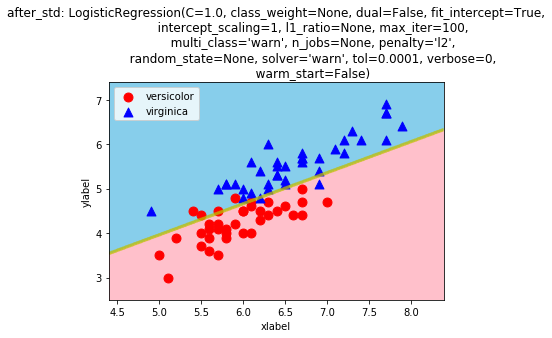

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


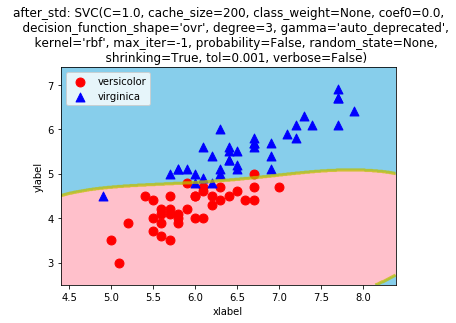

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


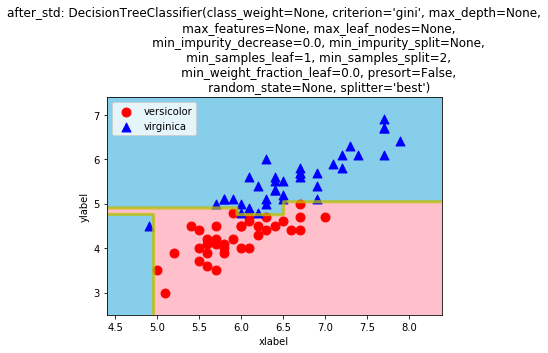

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


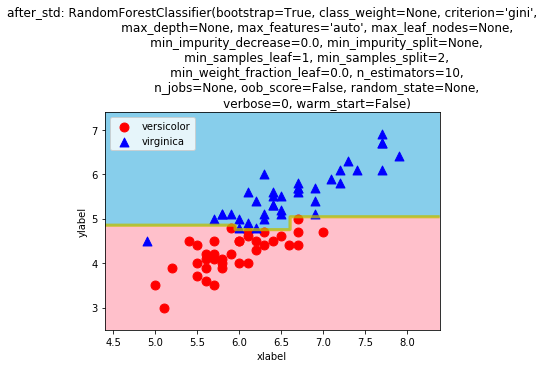

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [35]:
models = [KNeighborsClassifier(n_neighbors=1), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()] 

print("**標準化前**")
for model in models:
    clf = model
    clf.fit(X2_train, y_train)
    clf_pred = clf.predict(X2_test)

#     print(clf)     
#     print("正解率:{}".format(clf.score(X2_test, y_test)))
#     print("適合率:{}".format(precision_score(y2_test,clf_pred)))
#     print("再現率:{}".format(recall_score(y_test,clf_pred)))
#     print("F値 :{}".format(f1_score(y_test,clf_pred)))
#     print(confusion_matrix(y_test,clf_pred))
    decision_region(X=np.array(X2_train), y=y_train, model=clf, step=0.01, 
                 title="after_std: {}".format(model), xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")


In [36]:
models = {"KNeighborsClassifier":KNeighborsClassifier(n_neighbors=1), "LogisticRegression":LogisticRegression(), 
                  "SVC":SVC(), "DecisionTreeClassifier":DecisionTreeClassifier(), "RandomForestClassifier":RandomForestClassifier()}
scor_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

for model in models.values():
    clf = model
    clf.fit(X_train_std, y_train)
    clf_pred = clf.predict(X_test_std)
    scor_list.append(clf.score(X_test_std, y_test))
    precision_score_list.append(precision_score(y_test,clf_pred))
    recall_score_list.append(recall_score(y_test,clf_pred))
    f1_score_list.append(f1_score(y_test,clf_pred))

print("**標準化後**")
pd.DataFrame({
                   "正解率":scor_list, 
                   "適合率":precision_score_list, 
                   "再現率":recall_score_list, 
                   "F値 ":f1_score_list}, 
                    index=models.keys())

**標準化後**


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,正解率,適合率,再現率,F値
KNeighborsClassifier,0.84,0.785714,0.916667,0.846154
LogisticRegression,0.92,0.857143,1.000000,0.923077
SVC,0.92,0.857143,1.000000,0.923077
DecisionTreeClassifier,0.88,0.800000,1.000000,0.888889
RandomForestClassifier,0.88,0.846154,0.916667,0.880000


**標準化後**


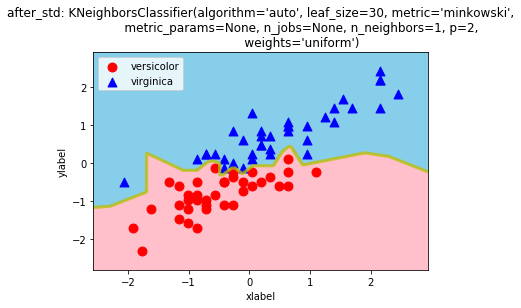

**標準化後**


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


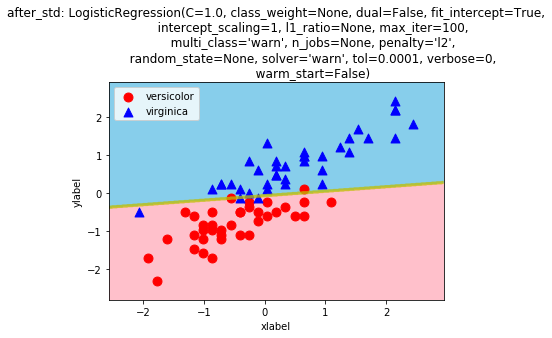

**標準化後**


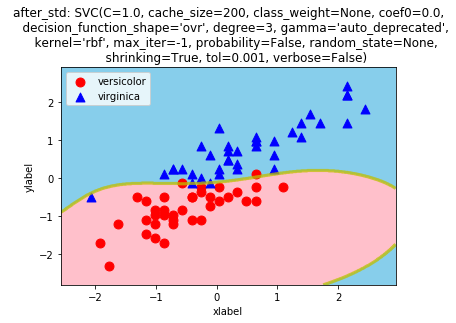

**標準化後**


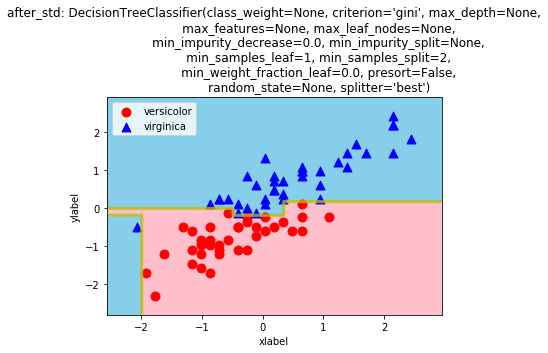

**標準化後**


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


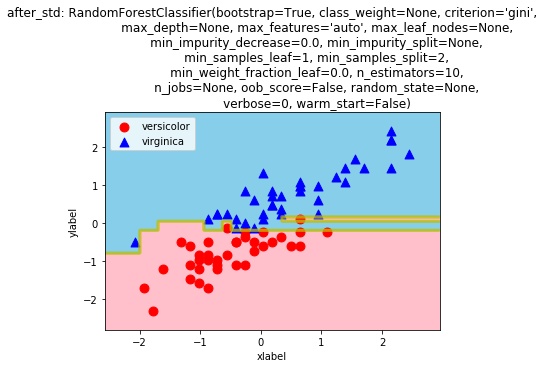

In [37]:
models = [KNeighborsClassifier(n_neighbors=1), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()] 

for model in models:
    clf = model
    print("**標準化後**")
    clf = model
    clf.fit(X_train_std, y_train)
    clf_pred = clf.predict(X_test_std)
#     print(clf)
#     print("正解率:{}".format(clf.score(X_test_std, y_test)))
#     print("適合率:{}".format(precision_score(y_test,clf_pred)))
#     print("再現率:{}".format(recall_score(y_test,clf_pred)))
#     print("F値 :{}".format(f1_score(y_test,clf_pred)))
#     print(confusion_matrix(y_test,clf_pred))
    decision_region(X=X_train_std, y=y_train, model=clf, step=0.01, 
                 title="after_std: {}".format(model), xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
    print("==============================================")

 - 「ロジスティック回帰」は、標準化により正解率・適合率・F値が高まっている。一方で、再現率の変化はみられない。
 -  「ランダムフォレスト」は、標準化により正解率・適合率・再現率・F値のいずれの指標とも高まっている。

 # 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

《多値になることでの変更点》

指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。

決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region2(X, y, model, step=0.01, title='decision region', 
                                        xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', "green"]
    contourf_color = ['pink', 'skyblue', "Cyan"]
    marker = ["o", "^", "x"]
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [39]:
X = iris.data
y = iris.target

In [40]:
X = X[:,[0,3]]

In [41]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

**標準化前**
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
正解率:0.9736842105263158
[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



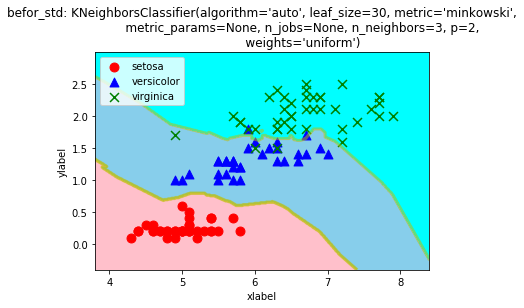

**標準化前**
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.7368421052631579
[[13  0  0]
 [ 1  6  9]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.38      0.55        16
           2       0.50      1.00      0.67         9

    accuracy                           0.74        38
   macro avg       0.81      0.79      0.73        38
weighted avg       0.86      0.74      0.72        38



/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


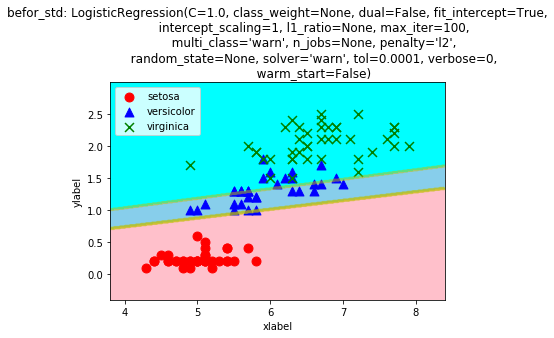

**標準化前**
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
正解率:0.9736842105263158
[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        16
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


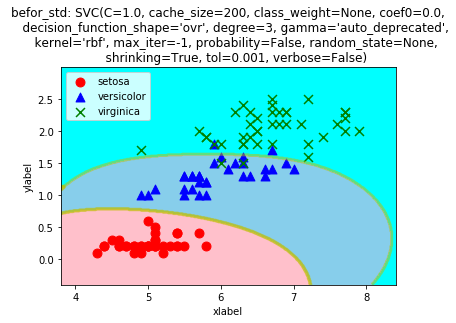

**標準化前**
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
正解率:0.9210526315789473
[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.88      0.90        16
           2       0.80      0.89      0.84         9

    accuracy                           0.92        38
   macro avg       0.91      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



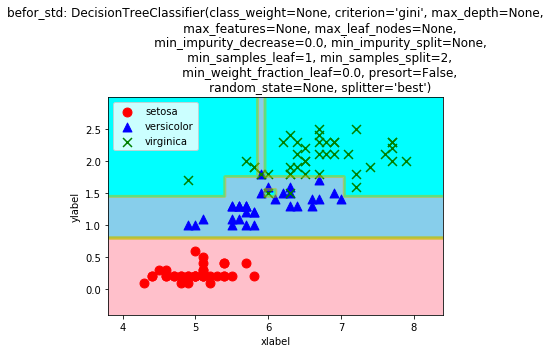

**標準化前**
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
正解率:0.9473684210526315
[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


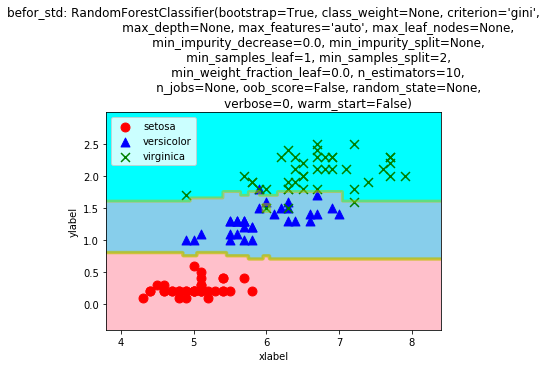

In [43]:
from sklearn.metrics import classification_report
models = {"KNeighborsClassifier":KNeighborsClassifier(n_neighbors=3), "LogisticRegression":LogisticRegression(), 
                  "SVC":SVC(), "DecisionTreeClassifier":DecisionTreeClassifier(), "RandomForestClassifier":RandomForestClassifier()}


for model in models.values():
    print("**標準化前**")
    clf = model
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(clf)
    print("正解率:{}".format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    decision_region2(X=np.array(X_train), y=y_train, model=clf, step=0.01, 
                 title="befor_std: {}".format(model), xlabel='xlabel', ylabel='ylabel', target_names=["setosa",'versicolor', 'virginica'])
    print("==============================================================")

**標準化後**
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
正解率:0.8947368421052632
[[13  0  0]
 [ 0 13  3]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.81      0.87        16
           2       0.73      0.89      0.80         9

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.91      0.89      0.90        38



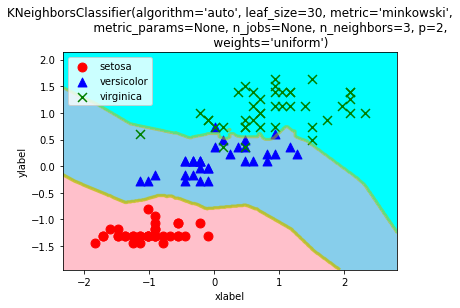

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.6842105263157895
[[13  0  0]
 [ 1  4 11]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.25      0.40        16
           2       0.45      1.00      0.62         9

    accuracy                           0.68        38
   macro avg       0.79      0.75      0.66        38
weighted avg       0.85      0.68      0.64        38



/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


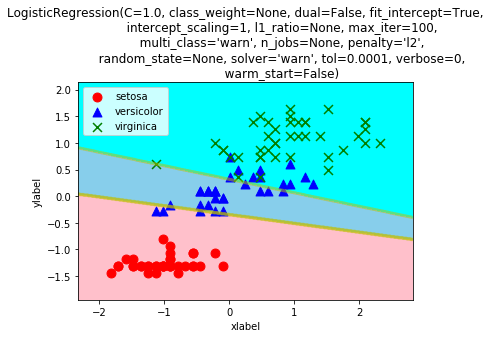

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
正解率:0.7894736842105263
[[13  0  0]
 [ 0  9  7]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.56      0.69        16
           2       0.53      0.89      0.67         9

    accuracy                           0.79        38
   macro avg       0.81      0.82      0.79        38
weighted avg       0.85      0.79      0.79        38



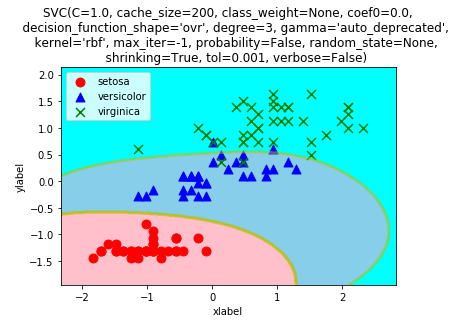

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
正解率:0.8947368421052632
[[13  0  0]
 [ 0 13  3]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.81      0.87        16
           2       0.73      0.89      0.80         9

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.89        38
weighted avg       0.91      0.89      0.90        38



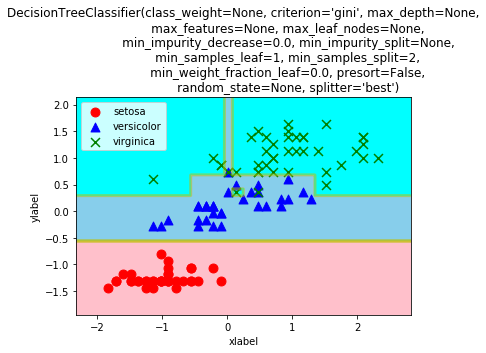

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
正解率:0.9210526315789473
[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.88      0.90        16
           2       0.80      0.89      0.84         9

    accuracy                           0.92        38
   macro avg       0.91      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


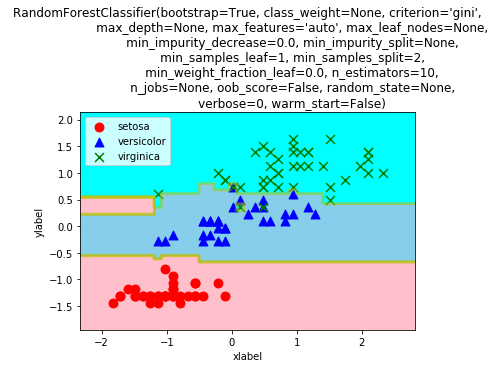

In [44]:
from sklearn.metrics import classification_report
models = {"KNeighborsClassifier":KNeighborsClassifier(n_neighbors=3), "LogisticRegression":LogisticRegression(), 
                  "SVC":SVC(), "DecisionTreeClassifier":DecisionTreeClassifier(), "RandomForestClassifier":RandomForestClassifier()}
print("**標準化後**")
for model in models.values():
    clf = model
    clf.fit(X_train_std, y_train)
    clf_pred = clf.predict(X_test_std)
    print(clf)
    print("正解率:{}".format(clf.score(X_test_std, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    decision_region2(X=X_train_std, y=y_train, model=clf, step=0.01, 
                 title=model, xlabel='xlabel', ylabel='ylabel', target_names=["setosa",'versicolor', 'virginica'])
    print("==============================================================")

 # ◉４特徴量で分析してみる

In [ ]:
X = iris.data
y = iris.target

In [ ]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [ ]:
from sklearn.metrics import classification_report
models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()] 
for model in models:
    clf = model
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(clf)
    print("正解率:{}".format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    print("====================")

 ## ◉交互作用項を追加

In [45]:
X = iris.data
y = iris.target

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [47]:
X_poly.shape

(150, 1000)

In [48]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X_poly, y, test_size=0.25, random_state=0,
)

In [49]:
list_i = [1.0, 0.5, 0.1, 0.01]
print("**4特徴量で3値分類**")
for i in list_i:
    clf = LogisticRegression(C=i, penalty='l1', )
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(clf)
    print("正解率:{}".format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    print(clf.coef_)
    print("===============================")

**4特徴量で3値分類**
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.66111385e-06
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.99692765e-04
  -1.39373503e-04  0.00000000e+00]
 [ 0.00000

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/skl

In [50]:
from sklearn.metrics import classification_report
models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()] 
print("**交互作用項を追加(3値分類)**")
for model in models:
    clf = model
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(clf)
    print("正解率:{}".format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    print("==============================")

**交互作用項を追加(3値分類)**
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
正解率:0.9210526315789473
[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.94      0.91        16
           2       0.88      0.78      0.82         9

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.9736842105263158
[[13 

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp

In [51]:
list_C = [100, 50, 10, 1, 0.5, 0.3, 0.1, 0.01]
print("ロジスティック回帰（正則化の強さ別）")
for i in list_C:
    print("L1正則化（C）：{}".format(i))
    clf = LogisticRegression(C=i, penalty='l1', )
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(clf)
    print("正解率:{}".format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    print(clf.coef_)
    print("==============================")


ロジスティック回帰（正則化の強さ別）
L1正則化（C）：100
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[ 1.70725191e-01  1.41971550e-01  0.00000000e+00 ...  4.83414317e-06
   1.70499788e-05 -2.88409568e-05]
 [-9.97506646e-02 -4.13652011e-01  1.08147054e-01 ... -6.93055446e-05
  -4.05408970e-05 -3.922201

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/skl

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.10932991e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 ## ◉特徴量をビニング（５つのビンに分割）

In [52]:
X = iris.data
y = iris.target

In [53]:
X_bin = np.array([range(150)]).reshape(150,1)
for i in range(4):
    X_bin = np.hstack((X_bin, np.digitize(X[:,i], bins=np.linspace(X[:,i].min(), X[:,i].max(), 10)).reshape(150,1)))

In [54]:
X_bin = X_bin[:, 1:]

In [55]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X_bin, y, test_size=0.25, random_state=0,
)

In [56]:
from sklearn.metrics import classification_report
models = [KNeighborsClassifier(n_neighbors=3), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()] 
print("**ビニング(3値分類)**")
for model in models:
    clf = model
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(clf)
    print("正解率:{}".format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    print("==============================")

**ビニング(3値分類)**
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
正解率:0.9210526315789473
[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.88      0.90        16
           2       0.80      0.89      0.84         9

    accuracy                           0.92        38
   macro avg       0.91      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.7894736842105263
[[13  0  

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 

In [57]:
list_C = [100, 50, 10, 1, 0.5, 0.3, 0.1, 0.01]
print("ロジスティック回帰（正則化の強さ別）")
for i in list_C:
    print("L1正則化（C）：{}".format(i))
    clf = LogisticRegression(C=i, penalty='l1', )
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(clf)
    print("正解率:{}".format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,clf_pred))
    print(classification_report(y_test,clf_pred))
    print(clf.coef_)
    print("==============================")

ロジスティック回帰（正則化の強さ別）
L1正則化（C）：100
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
正解率:0.9473684210526315
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38

[[-0.56270747  2.1900392  -2.03200303 -1.73821694]
 [ 0.11806679 -0.72105362  0.44217539 -0.57202143]
 [-2.50442607 -1.43153073  8.08864506  6.70715034]]
L1正則化（C）：50
LogisticRegression(C=50, class_weigh

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: Fu

In [58]:
X = iris.data[:,1:]
y = iris.target

In [59]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X_bin, y, test_size=0.25, random_state=0,
)

In [60]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(clf)
print("正解率:{}".format(clf.score(X_test, y_test)))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))
# decision_region3(X=X_train, y=y_train, model=clf, step=0.01, title='decision region', 
#                                         xlabel='xlabel', ylabel='ylabel', zlabel="zlabel", target_names=['setosa', 'versicolor', 'virginica'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
正解率:0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
